# Análisis del uso de la plataforma por parte de los usuarios

In [1]:
#importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

sns.set(style="whitegrid")

In [2]:
#cargo csv
events = pd.read_csv('./data/events.csv', low_memory=False)
pd.set_option('display.max_columns', 51)

In [3]:
#veo como esta formado
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Por el momento solo quiero analizar como se comportaron las personas sobre la plataforma
### Me quedo con las columnas mas importantes para el analisis

In [4]:
#me quedo con las columnas que me importan
events_short = events.filter(items=['timestamp','event','person','campaign_source','channel','new_vs_returning', 'search_engine', 'search_term'])

In [5]:
#veo como esta formado
events_short.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN


In [6]:
#cambio timestamp a datetime
#agrego la columna de mes
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['month'] = events['timestamp'].dt.month

events_short['timestamp'] = pd.to_datetime(events_short['timestamp'])
events_short['month'] = events_short['timestamp'].dt.month


In [7]:
#events_short['month'] = events_short['timestamp'].dt.month
#events_short['day'] = events_short['timestamp'].dt.day
#events_short.sort_values(by=['person', 'timestamp'], ascending=True)

### De todos los usuarios que generaron eventos en la plataforma, veamos cuantos son nuevos y cuales ya estuvieron anteriormente en la misma

In [8]:
events_short['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

Text(0.5,0,'Usuarios')

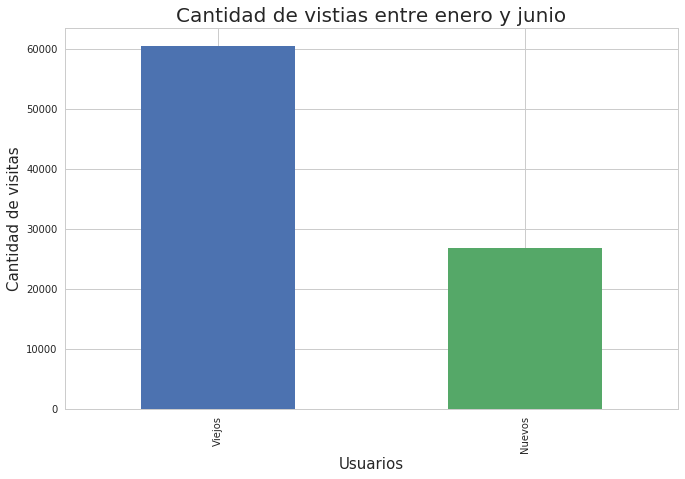

In [9]:
p = events_short['new_vs_returning'].value_counts().plot.bar(figsize=(11,7))
labels = ['Viejos', 'Nuevos']
p.set_xticklabels(labels)
p.set_ylabel('Cantidad de visitas', fontsize= 15)
p.set_title('Cantidad de vistias entre enero y junio', fontsize=20)
p.set_xlabel('Usuarios', fontsize=15)

Como se puede observar la mayoria de los usuarios que usaron la plataforma en los primeros 6 meses del 2018, son usuarios viejos.

## ¿De que manera llegaron a la plataforma los usuarios nuevos contra los viejos?

Elimino del dataframe todos los usuarios de los cuales no se tenga informacion si son nuevos o viejos.

In [10]:
#quiero analizar usuarios nuevos de los viejos
#elimino todos las filas en las q not enga esa informacion
new_vs_returning = events_short.dropna(subset=['new_vs_returning'])

In [11]:
#veo como esta formada
new_vs_returning.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,Paid,New,NaN,NaN,5
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,Paid,New,NaN,NaN,4
16,2018-05-24 11:21:07,visited site,000a54b2,NaN,Paid,Returning,NaN,NaN,5
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,Organic,New,NaN,NaN,4


In [12]:
new_vs_returning['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [13]:
new_vs_returning['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

## Creo dos dataframes distintos, uno que contenga las visitas de los usuarios nuevos y otro para los viejos

In [14]:
#creo dos dataframes nuevos uno con todos los usuarios returning y otro con la data de 
#todos los usuarios nuevos
#g = new_vs_returning.groupby(['month', 'channel']).agg({'new_vs_returning' : 'count'})
new = new_vs_returning.loc[(new_vs_returning['new_vs_returning'] == 'New') & (new_vs_returning['channel'] != 'Unknown')]
returning = new_vs_returning.loc[(new_vs_returning['new_vs_returning'] == 'Returning') & (new_vs_returning['channel'] != 'Unknown')]

In [15]:
#agrupo ambos dataframes por mes y canal
new = new.groupby(['month', 'channel']).agg({'new_vs_returning' : 'count'})
returning = returning.groupby(['month' , 'channel']).agg({'new_vs_returning' : 'count'})

In [16]:
#hago un pivot de table, transofmrando mes en indice, chanel en columnas y new_vs_returning como valores de ambos indices
new = new.pivot_table(index='month', columns='channel', values='new_vs_returning')
returning = returning.pivot_table(index='month', columns='channel', values='new_vs_returning')

### Como se puede observar en el siguiente grafico, la mayoria de los usuarios nuevos ingresan al sitio web por canales pagos

In [17]:
new.drop(columns=['Email'], inplace=True)

In [ ]:
p = new.plot.bar(figsize=(13,10))
p.set_ylabel('Cantidad de visitas', fontsize=20)
p.set_xlabel('Mes', fontsize=20)
p.set_title('Cantidad de visitas de usuarios nuevos por canal y mes', fontsize=30)

## Veamos que pasa con los usuarios que vuelven a la plataforma
### En el siguiente grafico se observa que el canal pago sigue predominando, pero a diferencia de los usuarios viejos se puede observar que muchos ingresan de forma directa al sitio web, por ende  la primera impresion que hayan tenido sobre el sitio web fue buena e interesante, ya que muchos decidieon volver de forma directa

In [19]:
returning.drop(inplace=True, columns=['Email'])

Text(0.5,1,'Cantidad de visitas de usuarios viejos por canal y mes')

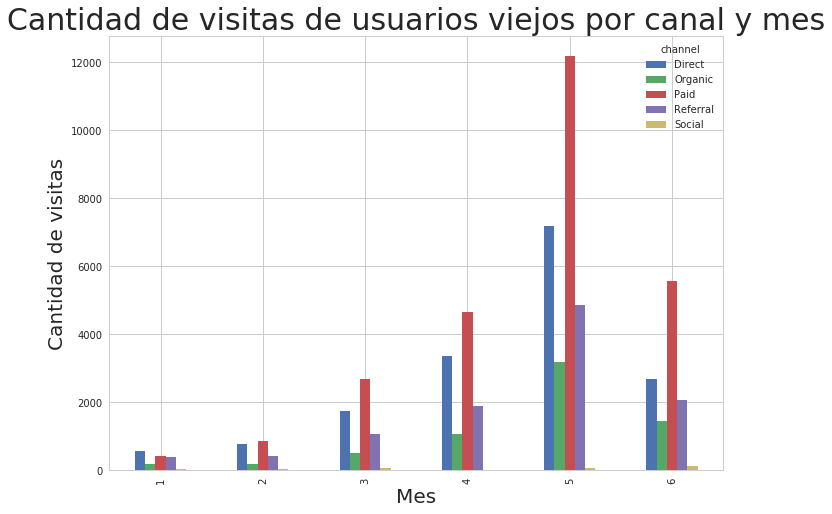

In [113]:
p = returning.plot.bar(figsize=(11,8))
p.set_ylabel('Cantidad de visitas', fontsize=20)
p.set_xlabel('Mes', fontsize=20)
p.set_title('Cantidad de visitas de usuarios viejos por canal y mes', fontsize=30)

In [21]:
total = new_vs_returning.groupby(['channel', 'new_vs_returning']).agg({'person':'count'})

In [22]:
total = total.pivot_table(index='channel', columns='new_vs_returning', values='person')

In [23]:
total.drop(index=['Unknown', 'Email'], inplace=True)

Text(0,0.5,'Cantidad de visitas')

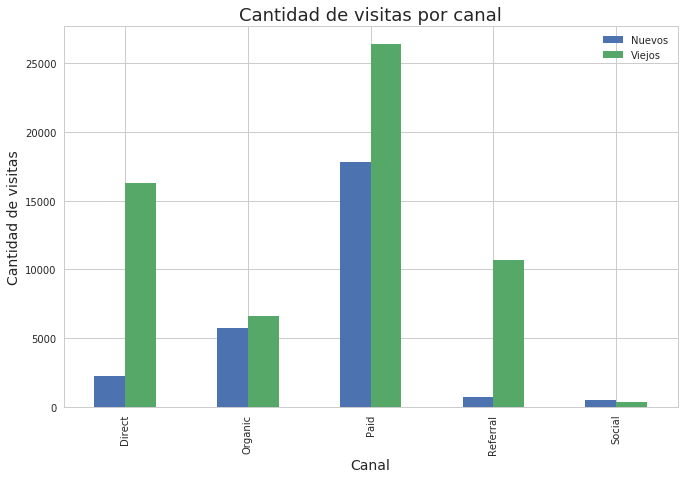

In [24]:
p = total.plot.bar(figsize=(11,7))
p.legend(['Nuevos','Viejos'])
p.set_xlabel('Canal', fontsize=14)
p.set_title('Cantidad de visitas por canal', fontsize=18)
p.set_ylabel('Cantidad de visitas', fontsize=14)

### Analicemos la cantidad de conversiones de los usuarios

In [25]:
#me quedo con los eventos de conversiones y checkout
check_conv = events_short.loc[(events_short['event'] == 'conversion') | (events_short['event'] == 'checkout')]

In [26]:
check_conv

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,NaN,NaN,NaN,NaN,5
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4
94,2018-05-04 18:50:21,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5
95,2018-05-17 04:45:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5
103,2018-05-17 00:11:26,checkout,0019c395,NaN,NaN,NaN,NaN,NaN,5
110,2018-06-08 12:19:50,checkout,001bb7eb,NaN,NaN,NaN,NaN,NaN,6
114,2018-05-29 12:56:27,checkout,001f1653,NaN,NaN,NaN,NaN,NaN,5


In [27]:
check_conv = check_conv.groupby(['month', 'event']).agg({'person' : 'count'})

In [28]:
check_conv

person
month event             
1     checkout       331
      conversion      63
2     checkout       441
      conversion      74
3     checkout      1386
      conversion     265
4     checkout      1965
      conversion     316
5     checkout     15645
      conversion     351
6     checkout     13967
      conversion     103

In [29]:
check_conv = check_conv.pivot_table(index='month', columns='event', values='person')

In [30]:
check_conv

event,checkout,conversion
month,,
1,331,63
2,441,74
3,1386,265
4,1965,316
5,15645,351
6,13967,103


### Como se puede observar en el siguiente grafico, la cantidad de checkouts supera ampliamente la cantidad de conversiones por mes.

## Tambien se puede ver como en el quinto mes, la cantidad de checkouts se multiplico por ocho sin embargo la cantidad de conversiones no aumentaron proporcionalmente junto con la cantidad de checkouts

## ¿Por que podria ser esto? ¿Por que aumentaron tanto los checkouts estos dos ultimos meses?

Text(0,0.5,'Cantidad')

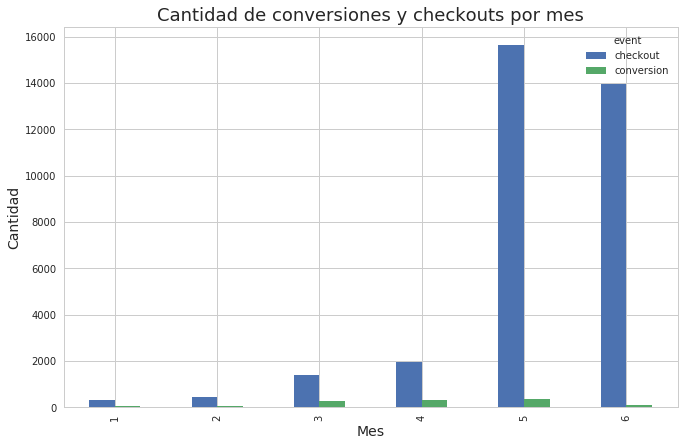

In [31]:
p = check_conv.plot.bar(figsize=(11,7))
p.set_title('Cantidad de conversiones y checkouts por mes',fontsize=18)
p.set_xlabel('Mes', fontsize=14)
p.set_ylabel('Cantidad', fontsize=14)

In [32]:
events_short.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5


### Analizaremos los meses de abril y mayo en el cual se ve este aumento desproporcionado de la cantidad de checkouts

In [33]:
events_may_april = events_short.loc[(events_short['month'] == 5) | (events_short['month'] == 4)]

In [34]:
events_may_april.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5


In [35]:
grouped = events_may_april.groupby(['month', 'channel']).agg({'event' : 'count'})

In [36]:
grouped = grouped.unstack()
grouped
#grouped = grouped.pivot_table(index='month', columns='channel', values='event')

event                                             
channel Direct Email Organic   Paid Referral Social Unknown
month                                                      
4         3548    12    1504   5606     1940     39       1
5         8214    35    5770  20632     5211    267       8

In [37]:
grouped = grouped.pivot_table(index='month', columns='channel', values='event')

### No se por que en vez de 4 y 5, me pone channel y month

#### Pero se puede ver como aumentaron por 4 la cantidad de usuarios pagos, se podria llegar a la conclusion de que los usuarios a pesar de obetenr mayor cantidad de visitas por usuarios pagos, estos raramente haran una conversion

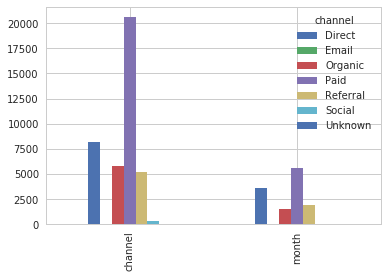

In [38]:
grouped.plot.bar()

### Intentemos categorizar a todos los usuarios, si son pagos o no pagos y luego de eso veremos cuales realizaorn conversiones y cuales no

#### Creo la columna 'paid' en el dataframe

In [39]:
events_short['paid'] = np.nan

#### Si el canal del evento es paid entonces, paid es true.

In [40]:
events_short['paid'] = np.where(events_short['channel'] == 'Paid', True, False)

#### Me quedo solo con los checkouts y las conversiones

In [41]:
check_conv = events_short.loc[(events_short['event'] == 'checkout') | (events_short['event'] == 'conversion')]

In [42]:
events_short['paid'].value_counts()

False    967095
True      44193
Name: paid, dtype: int64

In [43]:
events_short['person'].value_counts()

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
f814cc35       1
9b061c0c       1
4d0a2de2       1
fb454676       1
4be8d5bc       1
d01528a2       1
85803502       1
d04977fc       1
f6d97ad4       1
83d0c645       1
c6f188f8       1
48b6bf1c       1
75d3ba09       1
e4ecabef       1
5d1f4de1       1
d2b2977e       1
247156f5       1
91e2563e       1
f0600e87       1
f5f3c345       1
6d8a8a1f       1
759683a2       1
25887fff       1
574e9726       1
c3a2cd56       1
a20ecf2c       1
defd70f8       1
c7260da2      

#### Creo un nuevo dataframe, que va a estar compuesto por todos los usuarios, que son pagos

In [44]:
paid = events_short.loc[events_short['paid'] == True]

In [45]:
paid['paid'].value_counts()

True    44193
Name: paid, dtype: int64

#### Elimino los usuarios duplicados, ahora tengo un segundo dataframe, con todos los usuarios que alguna vez tuvierno algun evento pago

In [46]:
paid = events_short.drop_duplicates(subset='person')

In [47]:
paid['person'].value_counts()

dde56fb4    1
f7f6518d    1
460a7437    1
6131102a    1
eca3d357    1
368946df    1
edfa8bf2    1
db094762    1
92c2ec42    1
8828f7c3    1
fe672e94    1
3c9b6aba    1
1bcab968    1
493b7324    1
cfda0e78    1
e4924a68    1
f06d9696    1
7b9a5181    1
5b8592a7    1
2c5c3d55    1
eedf1e74    1
a45503a4    1
3b8229f6    1
3d93c645    1
70d4bf9c    1
9cbbd593    1
2e4831ce    1
2fa295c3    1
64bf1148    1
f6abd568    1
           ..
0d26ec0e    1
c55a81f9    1
a6882e1b    1
d4ee1872    1
6e9e7764    1
326a3ed4    1
01161b55    1
84c5fa3c    1
d4077e05    1
f8d9191d    1
f588e68c    1
c4e40520    1
1c29f439    1
305edfe8    1
33607d9e    1
72f6e44d    1
8874bc59    1
3822bd48    1
75afe539    1
80942ec0    1
84c68bbf    1
a9a3f800    1
3c939f3b    1
d896612a    1
3522ff21    1
f4fd052b    1
b10e00b3    1
a4bf87ed    1
d2716039    1
ccdb5ae1    1
Name: person, Length: 27624, dtype: int64

#### SI la persona del dataframe de checkouts y conversions esta en el dataframe de los usuarios pagos entonces 'paid' es true

In [48]:
check_conv.loc[check_conv['person'].isin(paid['person']), 'paid'] = True

/home/gonza/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Todos los usuarios en algun momento tuvieorn un evento pago

In [49]:
check_conv['person'].value_counts()

52a4edd3    39
2064597d    32
a0d4baef    31
19b38ba2    30
8ed3287f    28
78f2c20f    26
d38f5851    25
ee6772b4    25
5b9f64aa    24
4200bdee    23
cca66add    23
13e22697    22
1a13e375    22
02d599d3    22
3952fd6f    22
292b594a    21
7608c6e2    21
5f0c1d45    21
2925e132    21
48d14aeb    21
a96e304b    21
6257f5ae    21
07c062bf    21
4fd480b4    21
b7f832b9    20
3eb8d8c4    20
3b5a5833    20
4f950ef2    20
baa40260    20
6b07be7b    19
            ..
bff7cb1b     1
27cd027c     1
6d4009c8     1
4d82c902     1
76bec8bb     1
7181b159     1
2b99f32c     1
68c326a4     1
0f012f9f     1
0cf6ae2e     1
34ce53ab     1
70b8c8bc     1
abb0b6b4     1
d2a4f262     1
08d41b36     1
f243cb69     1
117d3832     1
02fa0fa3     1
4909f1ea     1
32af0dc5     1
8280bf63     1
6b2d1584     1
75cbac0e     1
e4045f51     1
4a9f4276     1
f57903fd     1
7c7989f0     1
4a4e3bbf     1
ef185e32     1
ccdb5ae1     1
Name: person, Length: 27624, dtype: int64

In [50]:
check_conv['paid'].value_counts()

True    34907
Name: paid, dtype: int64

# ¿Que tan efectivas fueron las campañas de anuncios?

In [51]:
events_short['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

Text(0,0.5,'Cantidad de visitas')

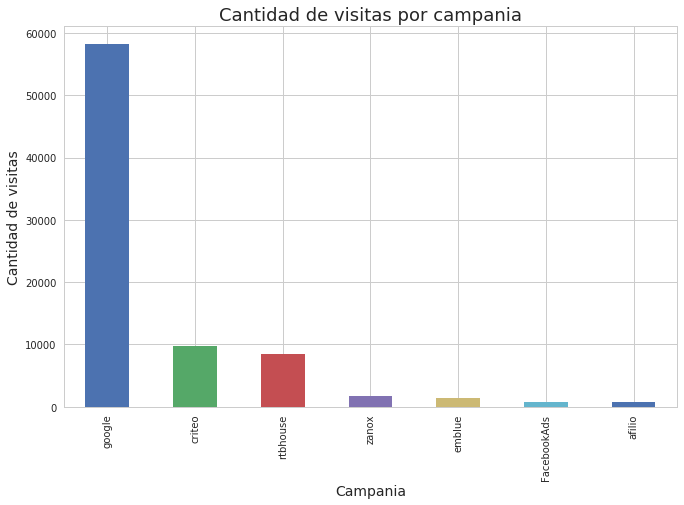

In [95]:
top_7 = events_short['campaign_source'].value_counts().head(7).plot.bar(figsize=(11,7))
top_7.set_title('Cantidad de visitas por campania', fontsize=18)
top_7.set_xlabel('Campania', fontsize=14)
top_7.set_ylabel('Cantidad de visitas', fontsize=14)

In [53]:
campaign_m = events_short.filter(items=['campaign_source', 'month', 'person'])


In [54]:
campaign_m = campaign_m.groupby(['campaign_source', 'month']).agg({'person':'count'})


In [55]:
campaign_m

person
campaign_source  month        
Facebook         2           2
                 3          12
                 4           6
                 5          38
                 6          19
FacebookAds      1          59
                 2          63
                 3         208
                 4          15
                 5         111
                 6         308
FacebookSocial   1           3
                 5           5
Google Social    6           1
MARKETING SOCIAL 6           7
afiliado         3           8
                 4           5
                 5          14
                 6           7
afilio           1         101
                 2          26
                 3          55
                 4          94
                 5         264
                 6         152
bing             1          16
                 2          11
                 3          52
                 4          53
                 5         255
...                        ...
manifest         1           1
                 3           2
                 4          31
                 5          55
                 6          37
mercadopago      5          10
                 6           8
onsite           2           3
rakuten          4          32
                 5         113
                 6         165
rtbhouse         1         136
                 2         274
                 3         717
                 4        1598
                 5        4122
                 6        1703
socialmedia      1           1
voxus            5         320
                 6         112
yotpo            1           1
                 4           1
                 5          19
                 6           4
zanox            1          70
                 2          62
                 3         157
                 4         252
                 5         737
                 6         395

[100 rows x 1 columns]

In [56]:
campaign_m = campaign_m.pivot_table(index='campaign_source', columns='month', values='person')

In [57]:
campaign_m.sort_values(by=[6], ascending=False, inplace=True)

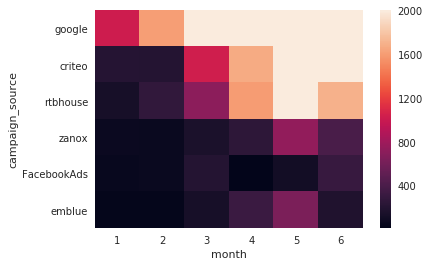

In [58]:
sns.heatmap(campaign_m.head(6), vmax=2000 )

In [59]:
ad_persons = events_short.loc[events_short['event'] == 'ad campaign hit']

In [60]:
ad_persons.sort_values('timestamp', inplace=True)

/home/gonza/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
ad_persons = ad_persons.drop_duplicates(subset=['person'], keep='first')

In [62]:
#events_short.loc[events_short['person'].isin(ad_persons['person']), 'ad_campaign'] = ad_persons['campaign_source']
events_short['ad_campaign'] = events_short['person'].map(ad_persons.set_index('person')['campaign_source'])

In [63]:
events_short

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month,paid,ad_campaign
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5,False,criteo
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5,True,criteo
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5,False,criteo
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5,False,criteo
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5,False,criteo
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,Paid,New,NaN,NaN,5,True,criteo
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,criteo,NaN,NaN,NaN,NaN,5,False,criteo
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5,False,criteo
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,4,False,google
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,Paid,New,NaN,NaN,4,True,google


In [64]:
ad_cc = events_short.loc[(events_short['event'] == 'checkout') | (events_short['event'] == 'conversion')]

In [65]:
ad_cc

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month,paid,ad_campaign
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5,False,criteo
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5,False,criteo
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,NaN,NaN,NaN,NaN,5,False,google
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4,False,NaN
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4,False,NaN
94,2018-05-04 18:50:21,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5,False,NaN
95,2018-05-17 04:45:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5,False,NaN
103,2018-05-17 00:11:26,checkout,0019c395,NaN,NaN,NaN,NaN,NaN,5,False,google
110,2018-06-08 12:19:50,checkout,001bb7eb,NaN,NaN,NaN,NaN,NaN,6,False,google
114,2018-05-29 12:56:27,checkout,001f1653,NaN,NaN,NaN,NaN,NaN,5,False,criteo


In [66]:
checkouts = ad_cc.loc[ad_cc['event'] == 'checkout']
conversions = ad_cc.loc[ad_cc['event'] == 'conversion']

In [67]:
check_g = checkouts.groupby(['ad_campaign', 'month']).agg({'person':'count'})
conv_g = conversions.groupby(['ad_campaign', 'month']).agg({'person':'count'})

In [68]:
conv_g

person
ad_campaign month        
Facebook    3           1
FacebookAds 1           1
            2           2
            3          19
            4           4
            5           3
afilio      1           4
            2           1
            3           5
            5           4
bing        1           1
            3           4
            4           3
            5           4
blog        4           2
buscape     2           2
            3           3
            4           3
            5           1
criteo      1           4
            2           2
            3          16
            4          37
            5          20
            6           1
emblue      1           1
            2           2
            3           1
            4           4
            5           1
            6           1
google      1          50
            2          59
            3         183
            4         204
            5         194
            6          18
indexa      4           1
            5           1
rakuten     6           1
rtbhouse    2           5
            3          12
            4          14
            5          23
            6           2
voxus       3           2
            5           1
zanox       1           1
            3           9
            4          15
            5           7
            6           3

In [69]:
check_g = check_g.pivot_table(index='ad_campaign', columns='month', values='person')
conv_g = conv_g.pivot_table(index='ad_campaign', columns='month', values='person')

In [70]:
check_g['sum'] = check_g.sum(axis=1)
check_g.sort_values(by='sum', ascending=False, inplace=True)
check_g.drop(columns='sum', inplace=True)

Text(0.5,69,'Mes')

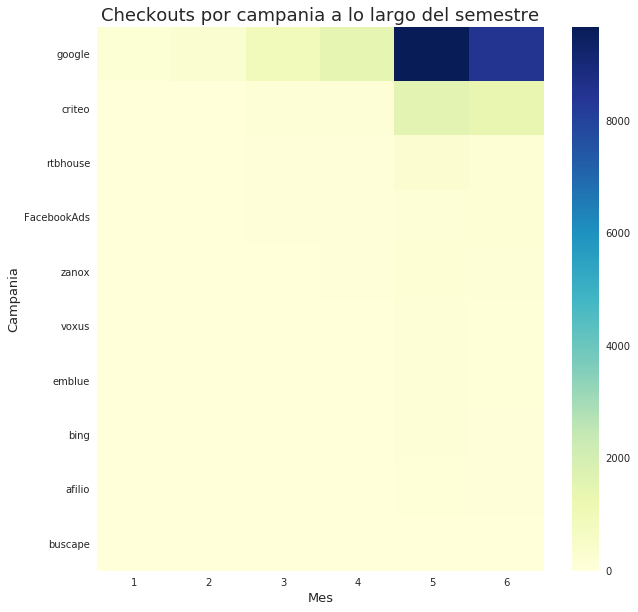

In [101]:
fig, ax = plt.subplots(figsize=(10,10))   
check_g.fillna(value=0, inplace=True)
h = sns.heatmap(check_g.head(10), cmap="YlGnBu", ax=ax)
h.set_title('Checkouts por campania a lo largo del semestre', fontsize=18)
h.set_ylabel('Campania', fontsize=13)
h.set_xlabel('Mes', fontsize=13)

Text(0.5,69,'Mes')

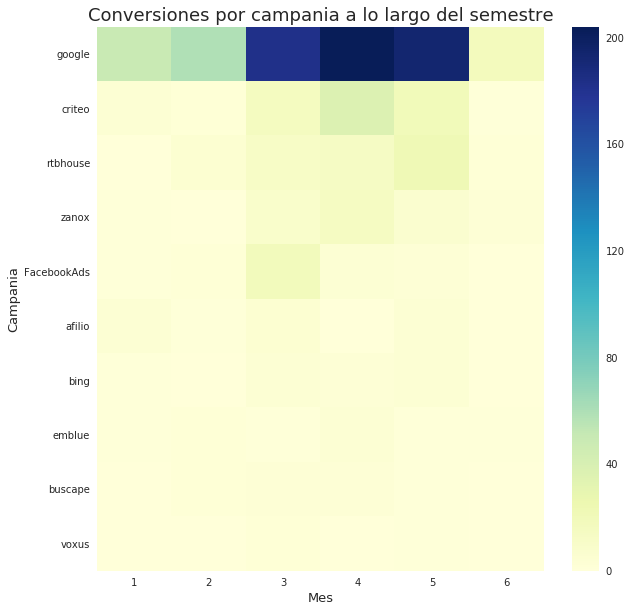

In [104]:
conv_g['sum'] = conv_g.sum(axis=1)
conv_g.sort_values(by='sum', ascending=False, inplace=True)
conv_g.drop(columns='sum', inplace=True)
conv_g.fillna(value=0, inplace=True)
fig, ax = plt.subplots(figsize=(10,10))   
h = sns.heatmap(conv_g.head(10), cmap="YlGnBu", ax=ax)
h.set_title('Conversiones por campania a lo largo del semestre', fontsize=18)
h.set_ylabel('Campania', fontsize=13)
h.set_xlabel('Mes', fontsize=13)

In [73]:
grouped = ad_cc.groupby(['event','ad_campaign']).agg({'person' : 'count'})
grouped

person
event      ad_campaign             
checkout   Facebook              34
           FacebookAds          436
           FacebookSocial        10
           MARKETING SOCIAL       1
           afiliado              17
           afilio               205
           bing                 243
           blog                  18
           buscape              113
           criteo              3203
           datacrush             23
           emblue               247
           google             21107
           indexa                40
           manifest               5
           mercadopago           13
           rakuten               19
           rtbhouse             569
           socialmedia            1
           voxus                264
           yotpo                  8
           zanox                393
conversion Facebook               1
           FacebookAds           29
           afilio                14
           bing                  12
           blog                   2
           buscape                9
           criteo                80
           emblue                10
           google               708
           indexa                 2
           rakuten                1
           rtbhouse              56
           voxus                  3
           zanox                 35

In [74]:
#grouped = grouped.unstack()

In [75]:
grouped = grouped.pivot_table(index='ad_campaign', columns='event', values='person')
#grouped.plot.bar()

In [76]:
grouped

event,checkout,conversion
ad_campaign,,
Facebook,34.0,1.0
FacebookAds,436.0,29.0
FacebookSocial,10.0,NaN
MARKETING SOCIAL,1.0,NaN
afiliado,17.0,NaN
afilio,205.0,14.0
bing,243.0,12.0
blog,18.0,2.0
buscape,113.0,9.0


In [77]:
grouped.sort_values(by='conversion', ascending=False, inplace=True)

In [78]:
events['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Text(0.5,0,'Campania')

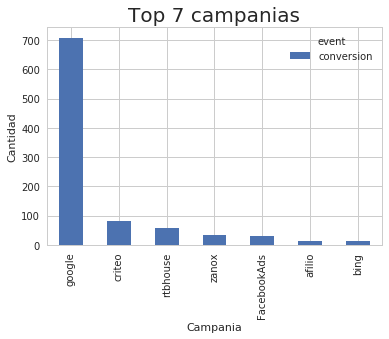

In [112]:
p = grouped.head(7).plot.bar()
p.set_title('Top 7 campanias', fontsize=20)
p.set_ylabel('Cantidad')
p.set_xlabel('Campania')

Text(0.5,0,'Campania')

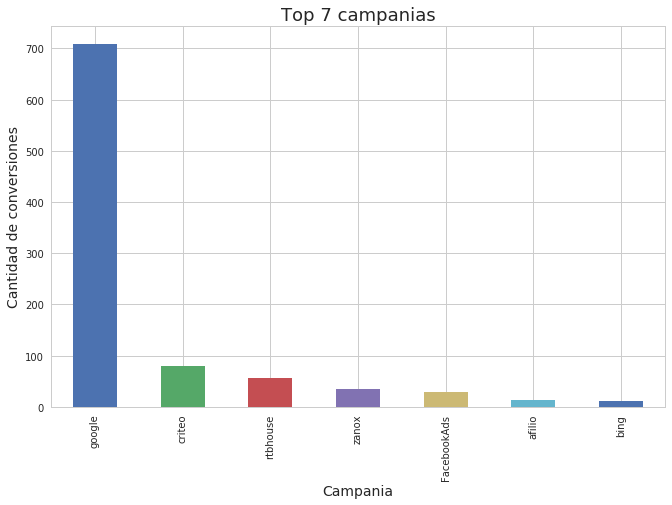

In [111]:
p = ad_cc.loc[ad_cc['event'] == 'conversion']['ad_campaign'].value_counts().head(7).plot.bar(figsize=(11,7))
#p = grouped.head(7).plot.bar(figsize=(11,7))
p.set_title('Top 7 campanias', fontsize=18)
p.set_ylabel('Cantidad de conversiones', fontsize=14)
p.set_xlabel('Campania', fontsize=14)

# Analisis lead y busqueda

In [82]:
events

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,5
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,4


In [83]:
events['search_term'].value_counts()

Iphone                                                1207
Iphone 6                                              1057
iPhone 6                                              1005
iphone 6                                               932
iphone                                                 882
iphone 6s                                              784
Iphone 6s                                              736
iPhone 6s                                              716
Motorola                                               679
iPhone                                                 638
J7                                                     580
J5                                                     540
Samsung                                                513
S7                                                     474
iphone 7                                               428
Iphone 7                                               412
iPhone 7                                               3

In [84]:
events['storage'].value_counts()

16GB     190833
32GB     184455
64GB     100024
128GB     40805
8GB       38181
256GB      6821
4GB        2152
512MB       565
Name: storage, dtype: int64

In [85]:
lead = events.loc[events['event'] == 'lead']

In [86]:
lead

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,month
3248,2018-04-17 22:11:19,lead,01139919,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
6636,2018-04-07 11:37:11,lead,01bca043,NaN,NaN,iPhone 6 Plus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7036,2018-02-12 17:23:30,lead,01db2fe6,NaN,NaN,Samsung Galaxy J5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
13041,2018-03-08 12:39:30,lead,03767f8e,NaN,NaN,iPhone 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
14203,2018-01-08 14:04:07,lead,03bdcd81,NaN,NaN,Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
14523,2018-05-20 22:00:27,lead,03d11a48,NaN,NaN,Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
19432,2018-04-17 16:40:49,lead,053e3907,NaN,NaN,iPhone 6 Plus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
19752,2018-04-11 21:30:54,lead,055142e0,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
19898,2018-04-13 21:07:01,lead,055142e0,NaN,NaN,Samsung Galaxy On 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
29375,2018-05-16 00:42:33,lead,07cd981f,NaN,NaN,iPhone 6S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [87]:
lead['model'].value_counts()

iPhone 6 Plus                          35
iPhone 6S Plus                         31
Samsung Galaxy J7 Prime                26
iPhone 6S                              21
Motorola Moto G4 Plus                  20
iPhone 8                               20
Samsung Galaxy A9 Pro 2016             15
Samsung Galaxy On 7                    15
Motorola Moto G5 Plus                  15
LG K10 Novo                            12
iPhone 6                               12
iPhone 7 Plus                           9
Motorola Moto G5S Plus                  9
Samsung Galaxy J7 PRO                   8
iPhone 8 Plus                           7
Lenovo Vibe A7010 Dual Chip             7
LG K10 TV                               6
iPhone 7                                5
Motorola Moto G4 Play DTV               5
LG K4                                   5
LG X Power                              5
Motorola Moto G2 3G Dual                5
iPhone 5s                               5
iPhone SE                         

In [88]:
lead_g = lead.groupby(['model', 'month']).agg({ 'person' : 'count'})

In [89]:
lead_g

person
model                       month        
Asus Zenfone 3 Max 16 GB    4           1
                            5           1
                            6           1
Blackberry Blackberry Z30   5           1
LG  X Screen                6           1
LG G3 Stylus D690           6           1
LG G4 H815P                 4           1
LG G4 H818P                 4           2
LG G4 Stylus H630           4           2
                            6           1
LG G5 SE                    2           1
                            5           1
LG K10                      3           1
                            5           2
                            6           1
LG K10 Novo                 4           1
                            5           8
                            6           3
LG K10 TV                   5           5
                            6           1
LG K4                       1           1
                            4           1
                            5           1
                            6           2
LG Prime Plus H522          4           1
                            6           1
LG X Power                  5           4
                            6           1
Lenovo Vibe A7010 Dual Chip 4           6
                            5           1
...                                   ...
iPhone 6S                   1           2
                            2           1
                            3           3
                            4           9
                            5           1
                            6           5
iPhone 6S Plus              1           2
                            3           8
                            4          10
                            5           7
                            6           4
iPhone 7                    1           1
                            2           1
                            5           1
                            6           2
iPhone 7 Plus               1           2
                            2           2
                            3           2
                            6           3
iPhone 8                    3           1
                            5          10
                            6           9
iPhone 8 Plus               4           1
                            5           2
                            6           4
iPhone SE                   1           1
                            3           1
                            4           3
iPhone X                    5           3
                            6           1

[185 rows x 1 columns]

In [90]:
lead_g.sort_values(by='person', inplace=True)

In [91]:
lead_g.unstack()

person                           
month                                    1    2    3     4     5    6
model                                                                
Asus Zenfone 3 Max 16 GB               NaN  NaN  NaN   1.0   1.0  1.0
Blackberry Blackberry Z30              NaN  NaN  NaN   NaN   1.0  NaN
LG  X Screen                           NaN  NaN  NaN   NaN   NaN  1.0
LG G3 Stylus D690                      NaN  NaN  NaN   NaN   NaN  1.0
LG G4 H815P                            NaN  NaN  NaN   1.0   NaN  NaN
LG G4 H818P                            NaN  NaN  NaN   2.0   NaN  NaN
LG G4 Stylus H630                      NaN  NaN  NaN   2.0   NaN  1.0
LG G5 SE                               NaN  1.0  NaN   NaN   1.0  NaN
LG K10                                 NaN  NaN  1.0   NaN   2.0  1.0
LG K10 Novo                            NaN  NaN  NaN   1.0   8.0  3.0
LG K10 TV                              NaN  NaN  NaN   NaN   5.0  1.0
LG K4                                  1.0  NaN  NaN   1.0   1.0  2.0
LG Prime Plus H522                     NaN  NaN  NaN   1.0   NaN  1.0
LG X Power                             NaN  NaN  NaN   NaN   4.0  1.0
Lenovo Vibe A7010 Dual Chip            NaN  NaN  NaN   6.0   1.0  NaN
Lenovo Vibe K5                         NaN  1.0  NaN   1.0   NaN  1.0
Motorola Moto G1 3G                    NaN  NaN  NaN   NaN   NaN  1.0
Motorola Moto G2 3G Dual               NaN  NaN  NaN   1.0   NaN  4.0
Motorola Moto G3 4G                    NaN  NaN  NaN   3.0   NaN  NaN
Motorola Moto G4 Play                  NaN  1.0  NaN   2.0   NaN  NaN
Motorola Moto G4 Play DTV              NaN  1.0  NaN   4.0   NaN  NaN
Motorola Moto G4 Plus                  2.0  1.0  4.0   4.0   2.0  7.0
Motorola Moto G5                       NaN  NaN  1.0   1.0   NaN  NaN
Motorola Moto G5 Plus                  NaN  NaN  NaN   5.0   1.0  9.0
Motorola Moto G5S                      NaN  NaN  NaN   NaN   1.0  2.0
Motorola Moto G5S Plus                 NaN  NaN  NaN   NaN   2.0  7.0
Motorola Moto MAXX                     NaN  NaN  NaN   NaN   1.0  NaN
Motorola Moto X Force                  NaN  NaN  NaN   1.0   1.0  NaN
Motorola Moto X Play 4G Dual           NaN  NaN  NaN   1.0   NaN  NaN
Motorola Moto Z                        1.0  NaN  2.0   NaN   NaN  NaN
...                                    ...  ...  ...   ...   ...  ...
Samsung Galaxy S3 Slim Duos            NaN  NaN  1.0   NaN   NaN  NaN
Samsung Galaxy S5 Mini Duos            NaN  NaN  NaN   NaN   NaN  1.0
Samsung Galaxy S6 Edge                 NaN  1.0  NaN   2.0   NaN  NaN
Samsung Galaxy S6 Flat                 NaN  NaN  1.0   NaN   NaN  NaN
Samsung Galaxy S7 Edge                 3.0  NaN  NaN   NaN   1.0  NaN
Samsung Galaxy S8                      1.0  NaN  1.0   NaN   NaN  NaN
Samsung Galaxy S8 Plus                 NaN  2.0  NaN   NaN   NaN  NaN
Samsung Galaxy Tab E 9.6 Wi-Fi         NaN  NaN  NaN   NaN   NaN  2.0
Samsung Galaxy Tab E 9.6 Wi-Fi + 3G    NaN  NaN  NaN   NaN   NaN  1.0
Samsung Galaxy Win 2 Duos TV           NaN  NaN  1.0   NaN   NaN  NaN
Samsung Galaxy Y Duos                  NaN  NaN  NaN   NaN   NaN  2.0
Sony Xperia M4 Aqua                    NaN  NaN  1.0   NaN   NaN  NaN
Sony Xperia Z3 TV                      NaN  NaN  NaN   1.0   NaN  NaN
iPad Air Wi-Fi + 4G                    NaN  NaN  NaN   NaN   2.0  NaN
iPad Mini Wi-Fi + 4G                   NaN  NaN  NaN   NaN   1.0  NaN
iPhone 4G                              1.0  NaN  NaN   1.0   1.0  NaN
iPhone 4S                              NaN  NaN  NaN   2.0   NaN  NaN
iPhone 5                               NaN  NaN  3.0   NaN   NaN  NaN
iPhone 5c                              NaN  NaN  1.0   3.0   NaN  NaN
iPhone 5s                              NaN  1.0  NaN   3.0   1.0  NaN
iPhone 6                               NaN  NaN  1.0  11.0   NaN  NaN
iPhone 6 Plus                          3.0  NaN  8.0  20.0   1.0  3.0
iPhone 6S                              2.0  1.0  3.0   9.0   1.0  5.0
iPhone 6S Plus                         2.0  Na

In [92]:
lead_g = lead_g.pivot_table(index='model', columns='month', values='person')

In [93]:
lead_g

month,1,2,3,4,5,6
model,,,,,,
Asus Zenfone 3 Max 16 GB,NaN,NaN,NaN,1.0,1.0,1.0
Blackberry Blackberry Z30,NaN,NaN,NaN,NaN,1.0,NaN
LG X Screen,NaN,NaN,NaN,NaN,NaN,1.0
LG G3 Stylus D690,NaN,NaN,NaN,NaN,NaN,1.0
LG G4 H815P,NaN,NaN,NaN,1.0,NaN,NaN
LG G4 H818P,NaN,NaN,NaN,2.0,NaN,NaN
LG G4 Stylus H630,NaN,NaN,NaN,2.0,NaN,1.0
LG G5 SE,NaN,1.0,NaN,NaN,1.0,NaN
LG K10,NaN,NaN,1.0,NaN,2.0,1.0


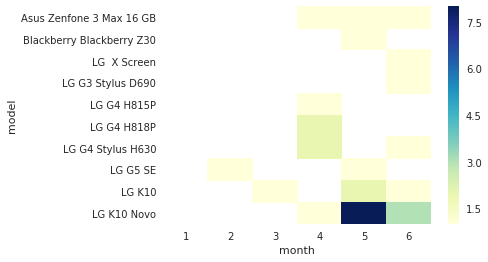

In [94]:
h = sns.heatmap(lead_g.head(10), cmap="YlGnBu")